In [19]:
import shutil
from urllib.request import Request, urlopen, urlretrieve
from io import BytesIO
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from pandas import DataFrame
import pandas as pd
import  datetime

XLSX_URL = "https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquotenmonitoring.xlsx?__blob=publicationFile"
PATH = "data.xlsx"

request = Request(XLSX_URL, headers={'User-Agent': 'Mozilla/5.0'})
f = urlopen(request).read()

wb = load_workbook(filename=BytesIO(f), read_only=True, data_only=True)

vaccination_sheet = wb["Impfungen_proTag"]
df = DataFrame(vaccination_sheet.values)
wb.close()

%matplotlib inline

In [20]:
new_header = df.iloc[0]
new_header[3] = "Gesamt"
df = df[1:]
df.columns = new_header


In [21]:
df["Datum"] = pd.to_datetime(df["Datum"], errors='coerce')

In [22]:
df = df[df["Datum"].notnull()]

In [23]:
df = df.set_index("Datum")

<AxesSubplot:xlabel='Datum'>

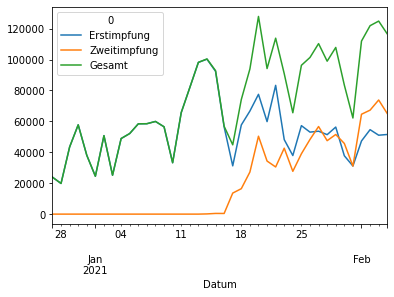

In [25]:
df.plot(y=["Erstimpfung", "Zweitimpfung", "Gesamt"])

<AxesSubplot:xlabel='Datum'>

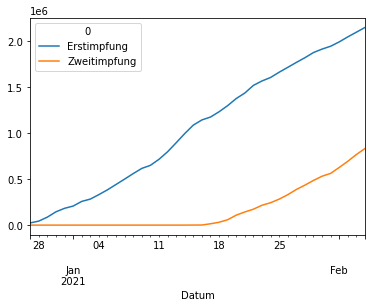

In [31]:
df[["Erstimpfung", "Zweitimpfung"]].cumsum().plot()